<div align="center">

# PyThresh Intro

</div>
<br>

PyThresh is a library centered around thresholding outlier detection likelihood scores in univariate/multivariate data. <br>
In it's simplest application, it contains many methods to identify the threshold point between inliers and outliers. <br> This is particularly useful in unsupervised applications.

# Let's get started!

To begin, we need to install pythresh to work with the notebook


In [ ]:
!pip install pythresh

We can now import a dataset to work with

In [1]:
import os
from scipy.io import loadmat
from pyod.utils.utility import standardizer

file = os.path.join('data', 'musk.mat')
mat = loadmat(file)

X = mat['X'].astype(float)
y = mat['y'].ravel().astype(int)

X = standardizer(X)


Now lets take a quick look at the data.

There are 2965 inliers and 97 outliers with a contamination of 3.17%


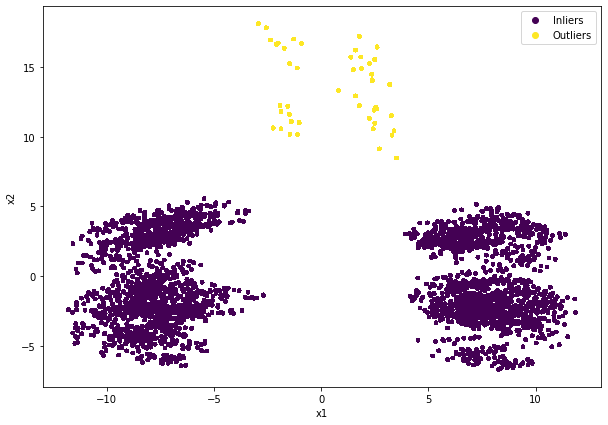

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def plotter(X, y):

    fig = plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=8, antialiased=False)
    handles, _ = scatter.legend_elements()
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(handles = handles, labels=['Inliers', 'Outliers', 'Uncertains'])
    plt.show()


# Lets see some stats
n = len(X)
inliers = len(y[y==0])
outliers = len(y[y==1])

print(f'There are {inliers} inliers and {outliers} outliers with a contamination of {round(outliers/n * 100, 2)}%') 

# To get a sense of the data lets decompose it into 2D
decomp = PCA(n_components=2)

X_decomp = decomp.fit_transform(X)

plotter(X_decomp, y)

<br>
As we can see above, even using a 2D decomposition of the data, we can clearly see a distinct outlier cluster. 

Let's see how well unsupervised outlier detection and thresholding perform

Are the fitted and predicted results the same? True

The f1 and mcc score of the outlier detection are 0.91 and 0.91 respectively


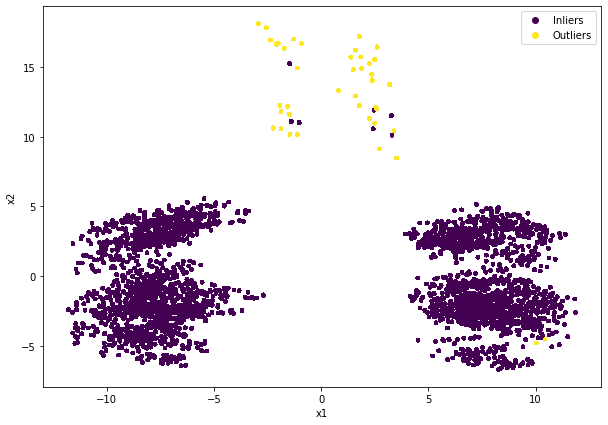

In [5]:
from pyod.models.iforest import IForest
from pythresh.thresholds.iqr import IQR
from sklearn.metrics import f1_score, matthews_corrcoef

# Initialize and fit OD and thresholder
od = IForest(random_state=1234)
od.fit(X)
scores = od.decision_scores_

thresh = IQR()
thresh.fit(scores)

# Let's make sure that the fit and predict give the same labels
fit_labels = thresh.labels_

test_scores = scores = od.decision_function(X) # this can be test data the OD method has never seen
pred_labels = thresh.predict(test_scores) # this can be test data the thresholding method has never seen

equality = np.array_equal(fit_labels, pred_labels)
print(f'Are the fitted and predicted results the same? {equality}')

# How did the unsupervised task perform, lets check the stats
metric1 = round(f1_score(y, fit_labels), 2)
metric2 = round(matthews_corrcoef(y, fit_labels), 2)

print(f'\nThe f1 and mcc score of the outlier detection are {metric1} and {metric2} respectively')

# While we are at it let's see the 2D PCA with the thresholded labels
plotter(X_decomp, fit_labels)

<br>
The OD and Thresholder performed relatively well, for a naive first go.

But there are many other advanced options that can be explored.
For that check the next notebook!